# CSS Knowledge

In [20]:
!pip install scrapy
import scrapy
from scrapy import Selector
import requests

url = "https://books.toscrape.com/"
response = requests.get(url)
sel = Selector(text=response.text)
books = sel.css("article.product_pod")

In [21]:
books

[<Selector query="descendant-or-self::article[@class and contains(concat(' ', normalize-space(@class), ' '), ' product_pod ')]" data='<article class="product_pod">\n       ...'>,
 <Selector query="descendant-or-self::article[@class and contains(concat(' ', normalize-space(@class), ' '), ' product_pod ')]" data='<article class="product_pod">\n       ...'>,
 <Selector query="descendant-or-self::article[@class and contains(concat(' ', normalize-space(@class), ' '), ' product_pod ')]" data='<article class="product_pod">\n       ...'>,
 <Selector query="descendant-or-self::article[@class and contains(concat(' ', normalize-space(@class), ' '), ' product_pod ')]" data='<article class="product_pod">\n       ...'>,
 <Selector query="descendant-or-self::article[@class and contains(concat(' ', normalize-space(@class), ' '), ' product_pod ')]" data='<article class="product_pod">\n       ...'>,
 <Selector query="descendant-or-self::article[@class and contains(concat(' ', normalize-space(@class), ' 

In [22]:
def scrape_books_simple():
    #Ambil halaman dengan requests
    url = "https://books.toscrape.com/"
    response = requests.get(url)
    # Parse dengan Scrapy Selector
    selector = Selector(text=response.text)
    # Extract data buku dengan CSS selector
    books = selector.css("article.product_pod")
    results = []
    for book in books:
        data = {
            "judul": book.css("h3 a::attr(title)").get(),
            "harga": book.css("div.product_price p.price_color::text").get(),
            "rating": book.css("p.star-rating::attr(class)").get().split()[1]
        }
        results.append(data)
    return results

# Jalankan scraping dan tampilkan hasil
book_results = scrape_books_simple()

In [23]:
book_results

[{'judul': 'A Light in the Attic', 'harga': 'Â£51.77', 'rating': 'Three'},
 {'judul': 'Tipping the Velvet', 'harga': 'Â£53.74', 'rating': 'One'},
 {'judul': 'Soumission', 'harga': 'Â£50.10', 'rating': 'One'},
 {'judul': 'Sharp Objects', 'harga': 'Â£47.82', 'rating': 'Four'},
 {'judul': 'Sapiens: A Brief History of Humankind',
  'harga': 'Â£54.23',
  'rating': 'Five'},
 {'judul': 'The Requiem Red', 'harga': 'Â£22.65', 'rating': 'One'},
 {'judul': 'The Dirty Little Secrets of Getting Your Dream Job',
  'harga': 'Â£33.34',
  'rating': 'Four'},
 {'judul': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'harga': 'Â£17.93',
  'rating': 'Three'},
 {'judul': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'harga': 'Â£22.60',
  'rating': 'Four'},
 {'judul': 'The Black Maria', 'harga': 'Â£52.15', 'rating': 'One'},
 {'judul': 'Starving Hearts (Triangular Trade Trilogy, #1)',
  'harga': 'Â£13.99',
  'r

In [24]:
import pandas as pd
df = pd.DataFrame(book_results)
df

,judul,harga,rating
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five
5,The Requiem Red,Â£22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,Four
9,The Black Maria,Â£52.15,One


# Use Case dengan Spider

In [25]:
# import scrapy
# import nest_asyncio
# import pandas as pd
# from scrapy.crawler import CrawlerRunner
# from twisted.internet import reactor, defer

# # Agar Twisted bisa jalan di Jupyter
# nest_asyncio.apply()

# # Global variabel untuk menyimpan hasil scraping
# results = []

# class BookSpider(scrapy.Spider):
#     name = 'books'
#     allowed_domains = ['books.toscrape.com']
#     start_urls = ['https://books.toscrape.com/']

#     custom_settings = {
#         'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
#         'DOWNLOAD_DELAY': 0.5,
#         'DEFAULT_REQUEST_HEADERS': {
#             'Accept-Encoding': 'gzip, deflate',  # Hapus Brotli dari encoding
#         },
#         'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',  # Hindari warning deprecasi
#     }

#     def parse(self, response):
#         # Scraping data dari setiap buku
#         for book in response.css('article.product_pod'):
#             results.append({
#                 'judul': book.css('h3 a::attr(title)').get(),
#                 'harga': book.css('.price_color::text').get(),
#                 'rating': book.css('p.star-rating::attr(class)').get().split()[-1], # Ambil rating terakhir
#                 'ketersediaan': 'In stock' if 'In stock' in book.css('p.availability::text').get() else 'Out of stock',
#                 'kategori': response.css('div.side_categories ul.nav li ul li a::text').get().strip(),
#                 'url': response.urljoin(book.css('h3 a::attr(href)').get())
#             })

#         # Cek apakah ada halaman berikutnya
#         next_page = response.css('li.next a::attr(href)').get()
#         if next_page:
#             yield response.follow(next_page, callback=self.parse) # Pindah ke halaman berikutnya

# # Fungsi untuk menjalankan spider di Jupyter
# @defer.inlineCallbacks
# def run_spider():
#     runner = CrawlerRunner()
#     yield runner.crawl(BookSpider)
#     reactor.stop()

# # Jalankan Scrapy di Jupyter Notebook
# def start_scraping():
#     d = run_spider()
#     reactor.run() # Blocking call, tidak bisa dipanggil 2x di Jupyter
#     return pd.DataFrame(results)

In [26]:
# Scraping data
# books_df = start_scraping()
# book_df.head()

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def start_scraping_all():
    results = []
    page = 1

    while True:
        if page == 1:
            url = "https://books.toscrape.com/"
        else:
            url = f"https://books.toscrape.com/catalogue/page-{page}.html"

        response = requests.get(url)

        # Kalau halaman tidak ditemukan → stop
        if response.status_code != 200:
            break

        soup = BeautifulSoup(response.text, "html.parser")
        books = soup.select("article.product_pod")

        # Kalau tidak ada buku → stop
        if not books:
            break

        for book in books:
            results.append({
                "judul": book.h3.a["title"],
                "harga": book.select_one(".price_color").text,
                "rating": book.p["class"][-1],
                "ketersediaan": book.select_one(".availability").text.strip(),
                "url": "https://books.toscrape.com/catalogue/" + book.h3.a["href"]
            })

        print(f"Page {page} selesai")
        page += 1

    return pd.DataFrame(results)


In [30]:
books_df = start_scraping_all()
books_df.head()

Page 1 selesai
Page 2 selesai
Page 3 selesai
Page 4 selesai
Page 5 selesai
Page 6 selesai
Page 7 selesai
Page 8 selesai
Page 9 selesai
Page 10 selesai
Page 11 selesai
Page 12 selesai
Page 13 selesai
Page 14 selesai
Page 15 selesai
Page 16 selesai
Page 17 selesai
Page 18 selesai
Page 19 selesai
Page 20 selesai
Page 21 selesai
Page 22 selesai
Page 23 selesai
Page 24 selesai
Page 25 selesai
Page 26 selesai
Page 27 selesai
Page 28 selesai
Page 29 selesai
Page 30 selesai
Page 31 selesai
Page 32 selesai
Page 33 selesai
Page 34 selesai
Page 35 selesai
Page 36 selesai
Page 37 selesai
Page 38 selesai
Page 39 selesai
Page 40 selesai
Page 41 selesai
Page 42 selesai
Page 43 selesai
Page 44 selesai
Page 45 selesai
Page 46 selesai
Page 47 selesai
Page 48 selesai
Page 49 selesai
Page 50 selesai


,judul,harga,rating,ketersediaan,url
0,A Light in the Attic,Â£51.77,Three,In stock,https://books.toscrape.com/catalogue/catalogue...
1,Tipping the Velvet,Â£53.74,One,In stock,https://books.toscrape.com/catalogue/catalogue...
2,Soumission,Â£50.10,One,In stock,https://books.toscrape.com/catalogue/catalogue...
3,Sharp Objects,Â£47.82,Four,In stock,https://books.toscrape.com/catalogue/catalogue...
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock,https://books.toscrape.com/catalogue/catalogue...


In [31]:
from numpy import astype
# Preprocessing data
# Bersihkan data harga
books_df['harga'] = (
    books_df['harga']
    .str.replace('Â£', '', regex=False)
    .str.replace('£', '', regex=False)
    .astype(float)
)


# Simpan ke CSV
books_df.to_csv('buku_Scrapy.csv', index=False)

In [32]:
# Statistik
print ("\Statistik harga buku")
print (books_df['harga'].describe())

\Statistik harga buku
count    1000.00000
mean       35.07035
std        14.44669
min        10.00000
25%        22.10750
50%        35.98000
75%        47.45750
max        59.99000
Name: harga, dtype: float64


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-601626079.py:2: SyntaxWarning: invalid escape sequence '\S'
  print ("\Statistik harga buku")


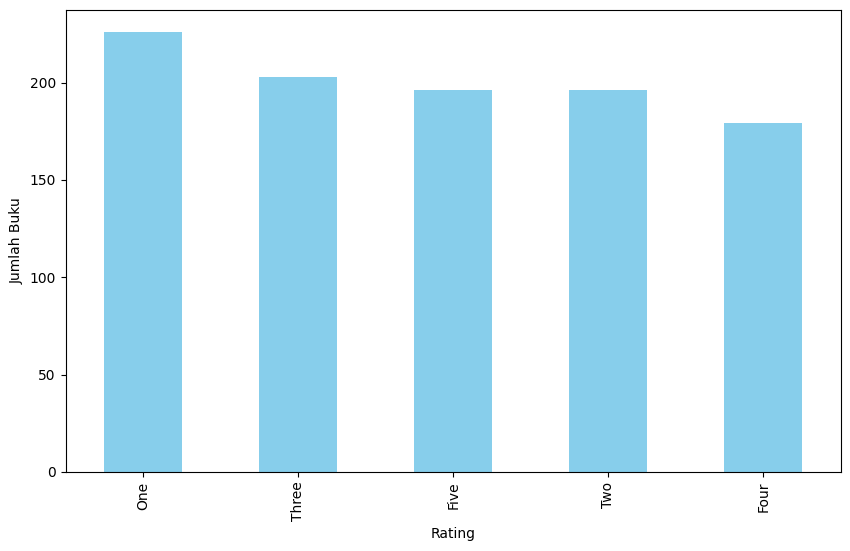

In [33]:
# Distibusi Rating

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
books_df['rating'].value_counts().plot(kind='bar',color='skyblue')
plt.title=('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.show()